## Deep learning models
#### Import packages, load data and define necussary function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
#read the training dataset after resampling and standardization
df = pd.read_csv('train_scaled.smote.csv')

#remove class and id
features = list(df.columns.values)
features.remove('class')
features.remove('id')

X = df[features]
y = df['class']
#split to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.7)

#set up the test set
df_test = pd.read_csv('test_scaled.csv')
features_test = list(df_test.columns.values)
features_test.remove('class')
features_test.remove('id')

X_test = df_test[features_test]

In [3]:
#define the function for sensitivity, specificity and f1 score
def ss(X, y, m):
    cm = confusion_matrix(y, np.rint(m.predict(X)))
    sen = cm[0][0] / (cm[0][0] + cm[0][1])
    spe = cm[1][1] / (cm[1][0] + cm[1][1])
    prec = cm[0][0] / (cm[0][0] + cm[1][0])
    f1 = 2 * prec * sen / (prec + sen)
    return sen, spe, f1

#### Define and train the data on three different models

The first model is a simple neural network with regular densely-connected NN layers. The second model is GRU (a type of RNN model) and the third model is another RNN model called LSTM.

In [4]:
#set the model
#this is a Neural Network which four layers. 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(753,)), #confirm the input shape
    keras.layers.Dense(256, activation=tf.nn.relu), 
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

#RMSprop, Adam, Adamax, Nadam
opt = keras.optimizers.Adamax(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 2s 274ms/step - loss: 0.8266 - accuracy: 0.5891 - val_loss: 1.3386 - val_accuracy: 0.3939
Epoch 2/150
3/3 [==============================] - 0s 37ms/step - loss: 0.7173 - accuracy: 0.6744 - val_loss: 0.8186 - val_accuracy: 0.5758
Epoch 3/150
3/3 [==============================] - 0s 36ms/step - loss: 0.5743 - accuracy: 0.7907 - val_loss: 0.6450 - val_accuracy: 0.6970
Epoch 4/150
3/3 [==============================] - 0s 35ms/step - loss: 0.3916 - accuracy: 0.8605 - val_loss: 0.5222 - val_accuracy: 0.7576
Epoch 5/150
3/3 [==============================] - 0s 36ms/step - loss: 0.2895 - accuracy: 0.9070 - val_loss: 0.5724 - val_accuracy: 0.6667
Epoch 6/150
3/3 [==============================] - 0s 36ms/step - loss: 0.2632 - accuracy: 0.8605 - val_loss: 0.5057 - val_accuracy: 0.6970
Epoch 7/150
3/3 [==============================] - 0s 34ms/step - loss: 0.1910 - accuracy: 0.9070 - val_loss: 0.5369 - val_accuracy: 0.7576
Epoch 8/150
3/3 [==

3/3 [==============================] - 0s 32ms/step - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.5336 - val_accuracy: 0.9091
Epoch 118/150
3/3 [==============================] - 0s 38ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.5340 - val_accuracy: 0.9091
Epoch 119/150
3/3 [==============================] - 0s 33ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.5345 - val_accuracy: 0.9091
Epoch 120/150
3/3 [==============================] - 0s 32ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.5350 - val_accuracy: 0.9091
Epoch 121/150
3/3 [==============================] - 0s 38ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.5357 - val_accuracy: 0.9091
Epoch 122/150
3/3 [==============================] - 0s 35ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.5363 - val_accuracy: 0.9091
Epoch 123/150
3/3 [==============================] - 0s 37ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.5367 - val_accuracy: 0.9091
Epoch 124/150
3/3 [=

In [5]:
#evaluate the model on validation set
valid_loss_nn, valid_acc_nn = model.evaluate(X_valid, y_valid)
print('Valid accuracy:', valid_acc_nn)

#for roc plot
y_pre_nn = model.predict(X_valid).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_valid, y_pre_nn)
auc_nn = auc(fpr_nn, tpr_nn)
print("AUC on validation set:", auc_nn)

#sensitivity, specificity and f1 score
sen_nn, spe_nn, f1_nn = ss(X_valid, y_valid, model)
print("Sencitivity for neural network:", sen_nn)
print("Specifity for neural network:", spe_nn)
print("F1 score for neural network:", f1_nn)

12/12 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.8413
Valid accuracy: 0.841269850730896
AUC on validation set: 0.9032754759238522
Sencitivity for neural network: 0.898936170212766
Specifity for neural network: 0.7842105263157895
F1 score for neural network: 0.8492462311557789


In [6]:
X_train = X_train.values.reshape(-1, 1, 753)
X_valid = X_valid.values.reshape(-1, 1, 753)
X_test  = X_test.values.reshape(-1, 1, 753)

In [7]:
#set the GUR model 
grumodel = keras.Sequential([
    keras.layers.GRU(256, input_shape=(1,753)),
    keras.layers.Dense(128, activation=tf.nn.softmax),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

#RMSprop, Adam, Adamax, Nadam
opt = keras.optimizers.RMSprop(learning_rate=0.001)
grumodel.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

grumodel.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.6932 - accuracy: 0.4884 - val_loss: 0.6912 - val_accuracy: 0.6364
Epoch 2/100
2/2 [==============================] - 0s 96ms/step - loss: 0.6884 - accuracy: 0.7442 - val_loss: 0.6865 - val_accuracy: 0.5455
Epoch 3/100
2/2 [==============================] - 0s 71ms/step - loss: 0.6825 - accuracy: 0.7054 - val_loss: 0.6786 - val_accuracy: 0.5758
Epoch 4/100
2/2 [==============================] - 0s 74ms/step - loss: 0.6726 - accuracy: 0.7209 - val_loss: 0.6811 - val_accuracy: 0.6364
Epoch 5/100
2/2 [==============================] - 0s 80ms/step - loss: 0.6721 - accuracy: 0.7829 - val_loss: 0.6787 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 72ms/step - loss: 0.6658 - accuracy: 0.7597 - val_loss: 0.6729 - val_accuracy: 0.6364
Epoch 7/100
2/2 [==============================] - 0s 80ms/step - loss: 0.6595 - accuracy: 0.7519 - val_loss: 0.6741 - val_accuracy: 0.6061
Epoch 8/100
2/2 [=====

In [8]:
#evaluate the model on validation set
valid_loss_gru, valid_acc_gru =grumodel.evaluate(X_valid, y_valid)
print('Valid accuracy:', valid_acc_gru)

#for roc plot
y_pre_gru = grumodel.predict(X_valid).ravel()
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_valid, y_pre_gru)
auc_gru = auc(fpr_gru, tpr_gru)
print("AUC on validation set:", auc_gru)

#sensitivity, specificity and f1 score
sen_gru, spe_gru, f1_gru = ss(X_valid, y_valid, grumodel)
print("Sencitivity for GRU:", sen_gru)
print("Specifity for GRU:", spe_gru)
print("F1 score for GRU:", f1_gru)

12/12 [==============================] - 0s 7ms/step - loss: 0.4287 - accuracy: 0.8439
Valid accuracy: 0.8439153432846069
AUC on validation set: 0.9337346024636057
Sencitivity for GRU: 0.9308510638297872
Specifity for GRU: 0.7578947368421053
F1 score for GRU: 0.8557457212713936


In [21]:
#set the LSTM model
lstmmodel = keras.Sequential([
    keras.layers.LSTM(256, input_shape=(1,753)),
    keras.layers.Dense(64, activation=tf.nn.softmax),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

#RMSprop, Adam, Adamax, Nadam
opt = keras.optimizers.RMSprop(learning_rate=0.01)
lstmmodel.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

lstmmodel.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.6934 - accuracy: 0.5039 - val_loss: 0.6904 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 90ms/step - loss: 0.6891 - accuracy: 0.7442 - val_loss: 0.6781 - val_accuracy: 0.5455
Epoch 3/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6732 - accuracy: 0.4961 - val_loss: 0.6480 - val_accuracy: 0.5455
Epoch 4/100
2/2 [==============================] - 0s 71ms/step - loss: 0.6431 - accuracy: 0.5039 - val_loss: 0.6289 - val_accuracy: 0.5758
Epoch 5/100
2/2 [==============================] - 0s 88ms/step - loss: 0.6105 - accuracy: 0.6899 - val_loss: 0.6245 - val_accuracy: 0.6364
Epoch 6/100
2/2 [==============================] - 0s 89ms/step - loss: 0.5880 - accuracy: 0.8605 - val_loss: 0.5963 - val_accuracy: 0.7879
Epoch 7/100
2/2 [==============================] - 0s 95ms/step - loss: 0.5643 - accuracy: 0.8837 - val_loss: 0.5834 - val_accuracy: 0.8182
Epoch 8/100
2/2 [=====

In [22]:
#evaluate the model on validation set
valid_loss_lstm, valid_acc_lstm = lstmmodel.evaluate(X_valid, y_valid)
print('Valid accuracy:', valid_acc_lstm)

#for roc plot
y_pre_lstm = lstmmodel.predict(X_valid).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_valid, y_pre_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)
print("AUC on validation set:", auc_lstm)

#sensitivity, specificity and f1 score
sen_lstm, spe_lstm, f1_lstm = ss(X_valid, y_valid, lstmmodel)
print("Sencitivity for LSTM:", sen_lstm)
print("Specifity for LSTM:", spe_lstm)
print("F1 score for LSTM:", f1_lstm)

12/12 [==============================] - 0s 7ms/step - loss: 0.7979 - accuracy: 0.8492
Valid accuracy: 0.8492063283920288
AUC on validation set: 0.9338605823068308
Sencitivity for LSTM: 0.8776595744680851
Specifity for LSTM: 0.8210526315789474
F1 score for LSTM: 0.8527131782945737


There is one main problem with deep learning models, all of the three models are not robust enough, possible reasons are:

(1) The dataset is not large enough to train a powerful and robust deep learning model;

(2) There are too many hyperparameters in these three models, and it takes time to do a grid search to find the best combination.

In [23]:
#predicted output
pred_lstm = lstmmodel.predict(X_test)
for i in pred_lstm:
    if i[0]>0.5:
        i[0] = 1
    else:
        i[0] = 0
df_test['pred']=pred_lstm
df_out = df_test[['id','pred']]

In [24]:
df_out.to_csv('Group8_result.csv')

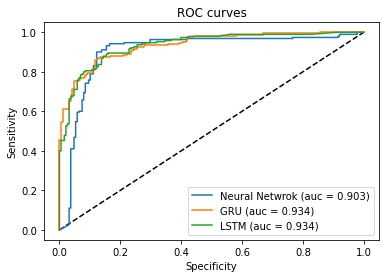

In [25]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Netwrok (auc = {:.3f})'.format(auc_nn))
plt.plot(fpr_gru, tpr_gru, label='GRU (auc = {:.3f})'.format(auc_gru))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (auc = {:.3f})'.format(auc_lstm))
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curves')
plt.legend(loc='best')
plt.show()